In [1]:
import numpy as np

In [2]:
quantiles = np.array([0.25, 0.5, 0.75])

In [3]:
y_true = np.array([3., 6. , 11., 0.])

In [6]:
y_pred = np.array([[1., 2.5, 4.], [4., 4.6, 6.], [9., 11.1, 13.], [-1., 0., 0.1]])

In [7]:
y_pred

array([[ 1. ,  2.5,  4. ],
       [ 4. ,  4.6,  6. ],
       [ 9. , 11.1, 13. ],
       [-1. ,  0. ,  0.1]])

In [9]:
cal = np.zeros(len(quantiles))
N = len(y_true)

In [14]:
for i in range(len(quantiles)):
    print((y_true < y_pred[:,i]))
    print((y_true < y_pred[:,i]).sum())
    cal[i] = (y_true < y_pred[:,i]).sum() / N

[False False False False]
0
[False False  True False]
1
[ True False  True  True]
3


In [15]:
cal

array([0.  , 0.25, 0.75])

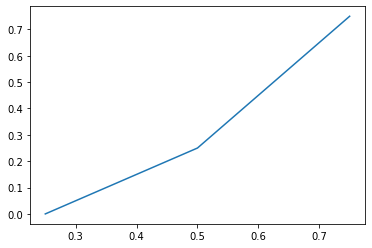

In [16]:
import matplotlib.pyplot as plt
plt.plot(quantiles, cal)

In [23]:
np.nanmedian([0.4, 1., .5, np.nan])

0.5

In [24]:
from matplotlib.colors import Normalize
from matplotlib.colors import ListedColormap
from matplotlib import cm
big = cm.get_cmap('autumn_r', 1024)
newcmp = ListedColormap(big(np.linspace(0.1, 1, 512)))

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-whitegrid')
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

SMALL_SIZE = 12 #8
MEDIUM_SIZE = 14 #10
BIGGER_SIZE = 16 #12
matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [119]:

def Hist2D(y_true, y_pred):

    #norm = Normalize(0, 100)
    bins = np.logspace(-3, 3, 101)
    freqs, _, _ = np.histogram2d(y_true, y_pred, bins=bins)
    
    freqs[freqs==0.0] = np.nan
    
    freqs = freqs/np.nansum(freqs)
    
    f, ax = plt.subplots(figsize=(8, 8))
    
    import matplotlib.colors as colors
    bounds = np.linspace(0, 1, 9)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both')

    m = ax.pcolormesh(bins, bins, freqs.T,  norm=norm)#, cmap=newcmp)#, norm=norm)
    ax.set_xlim([1e-3, 1e3])
    ax.set_ylim([1e-3, 1e3])
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Reference rain rate [mm / h]")
    ax.set_ylabel("Predicted rain rate [mm / h]")
    ax.plot(bins, bins, c="grey", ls="--")
    ax.set_aspect(1.0)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.07)
    plt.colorbar(m, cax=cax)

    plt.tight_layout()
    plt.plot()

In [127]:
y = np.random.uniform(1e-3,1e2,1000)

In [128]:
y_p = y + np.random.uniform(-100,100, 1000)

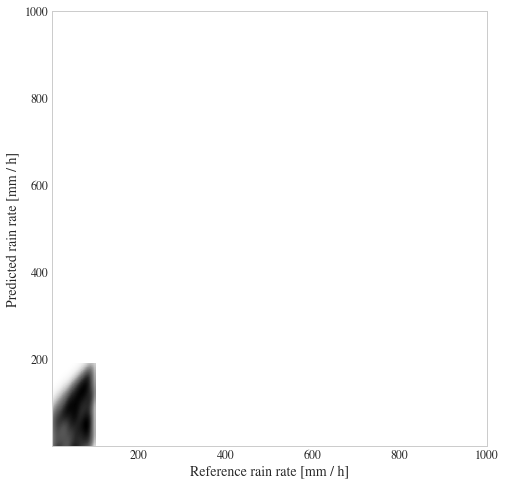

In [134]:
Density2D(y, y_p)